# Multi-variate Rregression

Linear fit is often inadequate but higher-order polynomial fits often leads to overfitting i.e. learns spurious, flawed relationships between input and output
R-square fit can often be misleding measure in case of high-dimensional regression
Metamodel can be constructed by selectively discovering features (or their combination) which matter and shrinking other high-order terms towards zero
LASSO: Least Absolute Shrinkage and Selection Operator
 
 
 
 
Import libraries


https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Multi-variate%20LASSO%20regression%20with%20CV.ipynb
https://www.saedsayad.com/support_vector_machine_reg.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Multi-variate regression


### Prepare data

In [2]:
df = pd.read_csv("out1.csv")
df.head()
df["coords"]=list(zip(df["long"], df["lat"]))
df.pivot_table(index="coords",
               columns="band",
               values = "map_rescaled").head()


band,02,03,04,05,06,07,08,11,12,8A
coords,,,,,,,,,,
"(-5.54839898, 42.37787055)",0.1845,0.2251,0.2486,0.2987,0.3717,0.3943,0.4030,0.3723,0.3017,0.4088
"(-5.54799999, 42.37965659)",0.1978,0.2343,0.2706,0.3143,0.3766,0.3964,0.4002,0.4084,0.3445,0.4048
"(-5.54669242, 42.40362733)",0.1854,0.2335,0.2539,0.3159,0.4198,0.4494,0.4428,0.3950,0.3251,0.4586
"(-5.54636819, 42.40427712)",0.1808,0.2170,0.2383,0.2893,0.3858,0.4116,0.3833,0.3671,0.2912,0.4241
"(-5.54035797, 42.42232626)",0.1800,0.2242,0.2545,0.3083,0.3921,0.4134,0.4100,0.4110,0.3289,0.4312


In [3]:
import numpy as np

X = df.pivot_table(index="coords",
               columns="band",
               values = "map_rescaled",aggfunc=np.mean).values
X

array([[0.1845, 0.2251, 0.2486, ..., 0.3723, 0.3017, 0.4088],
       [0.1978, 0.2343, 0.2706, ..., 0.4084, 0.3445, 0.4048],
       [0.1854, 0.2335, 0.2539, ..., 0.395 , 0.3251, 0.4586],
       ...,
       [0.1933, 0.2167, 0.2389, ..., 0.3746, 0.319 , 0.3432],
       [0.2421, 0.2968, 0.358 , ..., 0.4526, 0.3932, 0.3989],
       [0.2407, 0.2919, 0.3461, ..., 0.4388, 0.3861, 0.4008]])

In [4]:
y = df.groupby("coords").mean()["read"].values
'''y = (y_sin_normalizar-np.min(y_sin_normalizar))/(np.max(y_sin_normalizar)-np.min(y_sin_normalizar))'''
y

array([2.09452208, 2.26202592, 1.77870769, ..., 2.70239   , 2.46318   ,
       2.70239   ])

In [5]:
str_array = ['02','03','04','05','06','07','08','11','12','8A']
df=pd.DataFrame(X,columns=[strval  for strval in str_array])
df.head()

,02,03,04,05,06,07,08,11,12,8A
0,0.1845,0.2251,0.2486,0.2987,0.3717,0.3943,0.4030,0.3723,0.3017,0.4088
1,0.1978,0.2343,0.2706,0.3143,0.3766,0.3964,0.4002,0.4084,0.3445,0.4048
2,0.1854,0.2335,0.2539,0.3159,0.4198,0.4494,0.4428,0.3950,0.3251,0.4586
3,0.1808,0.2170,0.2383,0.2893,0.3858,0.4116,0.3833,0.3671,0.2912,0.4241
4,0.1800,0.2242,0.2545,0.3083,0.3921,0.4134,0.4100,0.4110,0.3289,0.4312


In [6]:
print("Plot the random distributions of input features")

Plot the random distributions of input features


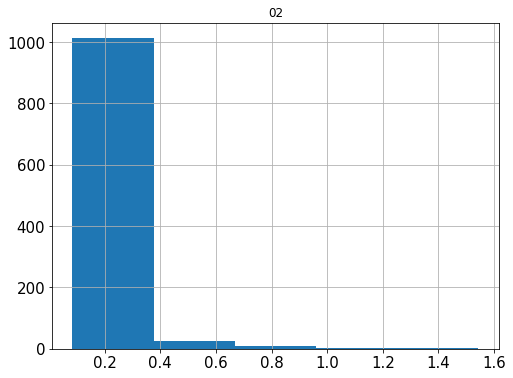

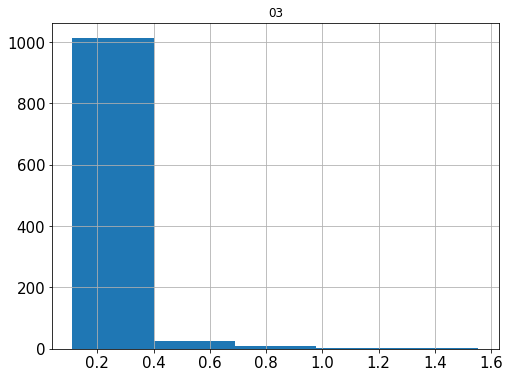

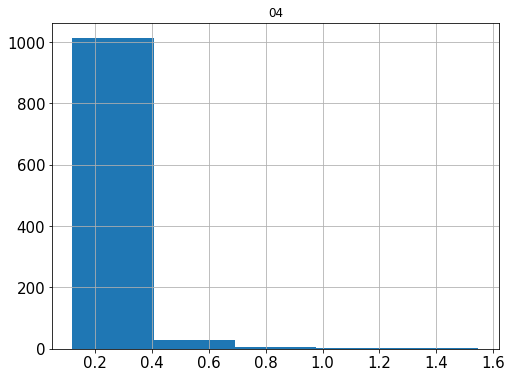

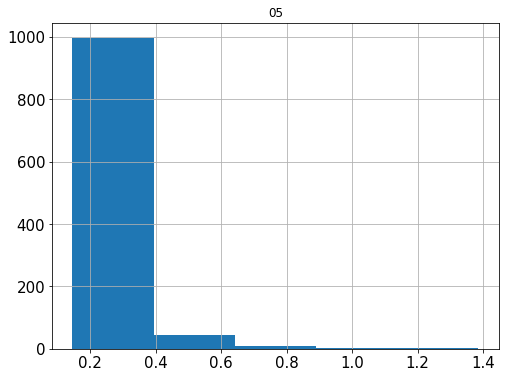

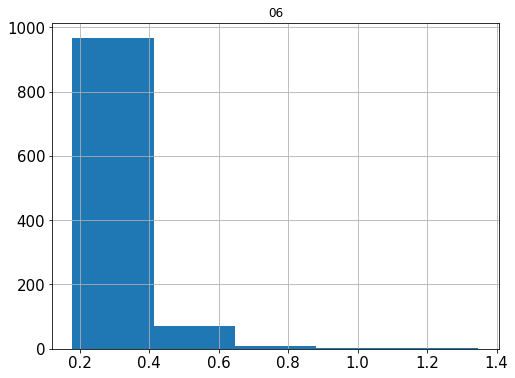

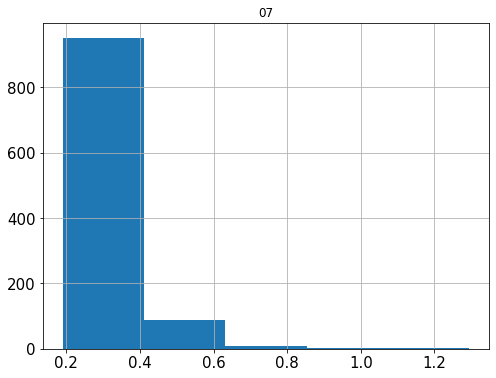

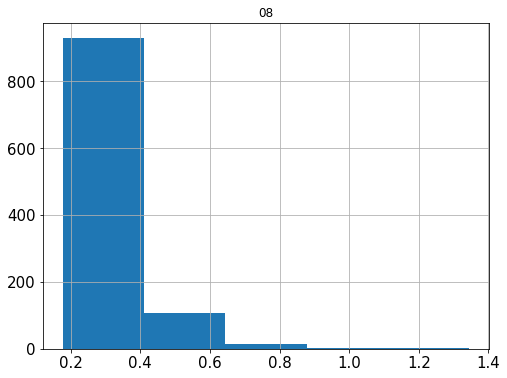

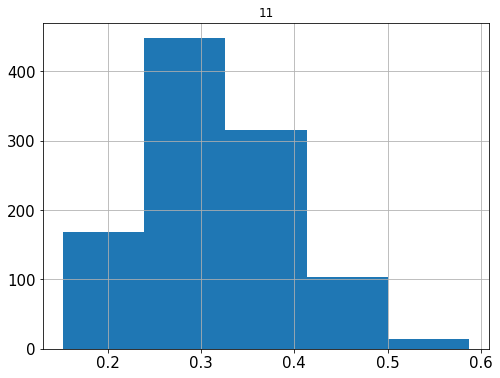

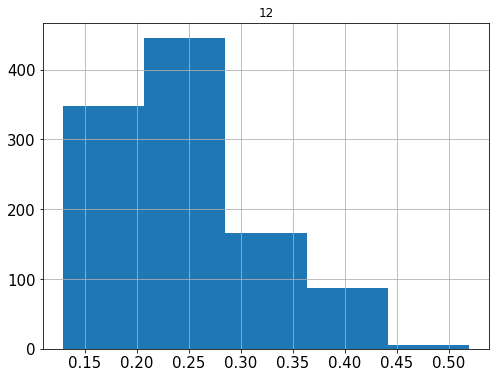

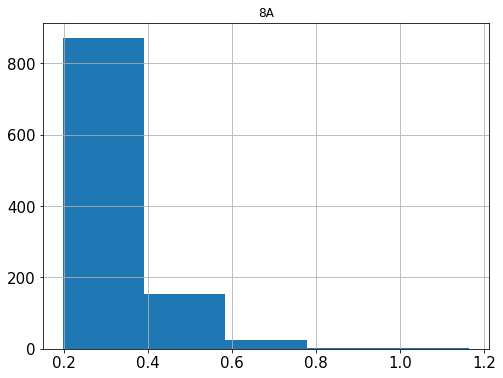

In [7]:
for i in df.columns:
    df.hist(i,bins=5,xlabelsize=15,ylabelsize=15,figsize=(8,6))

### Normalizando entre 0 y 1

In [8]:
x_norm = (X-np.min(X))/(np.max(X)-np.min(X))
x_norm

array([[0.06823593, 0.09585686, 0.11184434, ..., 0.19599973, 0.14796925,
        0.22083135],
       [0.07728417, 0.10211579, 0.12681135, ..., 0.22055922, 0.17708688,
        0.21811008],
       [0.06884822, 0.10157154, 0.11545003, ..., 0.21144296, 0.1638887 ,
        0.2547112 ],
       ...,
       [0.07422274, 0.09014219, 0.10524525, ..., 0.19756446, 0.15973876,
        0.17620246],
       [0.10742227, 0.14463569, 0.18627117, ..., 0.25062929, 0.21021838,
        0.2140962 ],
       [0.10646983, 0.14130213, 0.17817539, ..., 0.2412409 , 0.20538812,
        0.2153888 ]])

### Test/train split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Support vector regressor with linear kernel

Here is scikit-learn's SVR doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [11]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(kernel='linear')

RMSE for linear : 1.9263352006272656


/home/josemanuela/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Y_real', ylabel='Y_pred'>

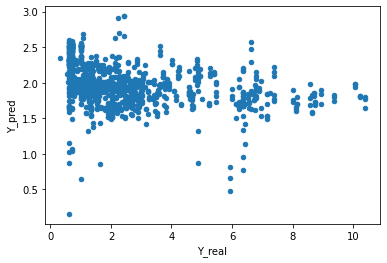

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
y_pred = cross_val_predict(svr_linear, X, y, cv=10)
resultados = pd.DataFrame({"Y_real":y,"Y_pred":y_pred})
resultados.plot(kind="scatter",x="Y_real",y="Y_pred")

### Test score

In [13]:
svr_linear.score(X_test,y_test)

-0.010771778354709216

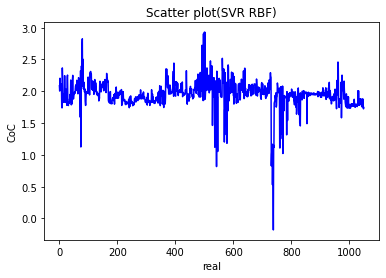

In [14]:
x_rbf = svr_linear.fit(X_train, y_train).predict(X)
X_grid = np.arange(X.min(), X.max(), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(x_rbf, color = 'blue')
plt.title('Scatter plot(SVR RBF)')
plt.xlabel('real')
plt.ylabel('CoC')
plt.show()

### Linear regression as a baseline

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear = LinearRegression()

In [17]:
linear.fit(X_train,y_train)

LinearRegression()

In [18]:
linear.score(X_test,y_test)

0.05597169347719744

### Linear regression as a baseline

RMSE for linear : 1.8616490597897657


/home/josemanuela/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Y_real', ylabel='Y_pred'>

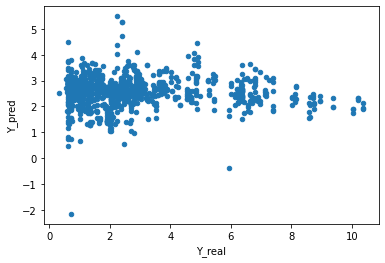

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))
y_pred = cross_val_predict(linear, X, y, cv=10)
resultados = pd.DataFrame({"Y_real":y,"Y_pred":y_pred})
resultados.plot(kind="scatter",x="Y_real",y="Y_pred")

### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {'C':np.logspace(-1,3,20),'gamma': np.linspace(0.1, 0.9, 9),'epsilon': [0.0001] ,'tol':[0.0001]} 
svr_rbf = SVR(kernel='rbf')

In [45]:
    grid = GridSearchCV(svr_rbf,param_grid=params,cv=7,scoring='r2', verbose=1,return_train_score=True)

In [47]:
grid.fit(X_train,y_train)

Fitting 7 folds for each of 180 candidates, totalling 1260 fits


GridSearchCV(cv=7, estimator=SVR(),
             param_grid={'C': array([1.00000000e-01, 1.62377674e-01, 2.63665090e-01, 4.28133240e-01,
       6.95192796e-01, 1.12883789e+00, 1.83298071e+00, 2.97635144e+00,
       4.83293024e+00, 7.84759970e+00, 1.27427499e+01, 2.06913808e+01,
       3.35981829e+01, 5.45559478e+01, 8.85866790e+01, 1.43844989e+02,
       2.33572147e+02, 3.79269019e+02, 6.15848211e+02, 1.00000000e+03]),
                         'epsilon': [0.0001],
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.0001]},
             return_train_score=True, scoring='r2', verbose=1)

### Check which was deemed best estimator by the grid search

In [48]:
grid.best_estimator_

SVR(C=615.8482110660261, epsilon=0.0001, gamma=0.8, tol=0.0001)

### Calculo de la mejor aproximación

In [49]:
svr_best=SVR(kernel='rbf', C=615.8482110660261, epsilon=0.0001, gamma=0.8, tol=0.0001 )
svr_best.fit(X_train, y_train)

SVR(C=615.8482110660261, epsilon=0.0001, gamma=0.8, tol=0.0001)

In [50]:
svr_best.score(X_test,y_test)

-0.010776320408138806

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr_best, X, y, cv = 5)
print(scores)
print(scores.mean())
print(scores.std())

[-0.11260044 -0.14364583 -1.12323519 -0.77683666 -5.93871604]
-1.6190068331536942
2.193667161850386


### Datos de RMSE y scatter plot con valores reales y predecidos

RMSE for linear SVR: 1.9263352006272656
RMSE for RBF kernelized SVR: 1.9263395287593734


/home/josemanuela/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Y_real', ylabel='Y_pred'>

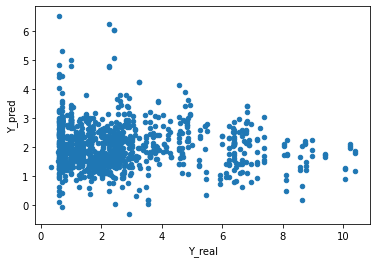

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))
y_pred = cross_val_predict(svr_best, X, y, cv=10)
resultados = pd.DataFrame({"Y_real":y,"Y_pred":y_pred})
resultados.plot(kind="scatter",x="Y_real",y="Y_pred")

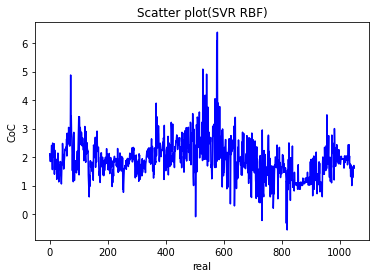

In [38]:
x_rbf = svr_best.fit(X_train, y_train).predict(X)
X_grid = np.arange(X.min(), X.max(), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(x_rbf, color = 'blue')
plt.title('Scatter plot(SVR RBF)')
plt.xlabel('real')
plt.ylabel('CoC')
plt.show()

In [ ]:
# Display results


### Support vector regressor with polynomial (radial basis function) kernel

In [ ]:
svr_poly = SVR(kernel='poly',gamma='scale', C=1.0, degree=2)
svr_poly.fit(X_train, y_train) 

In [ ]:
svr_poly.score(X_test,y_test)

In [ ]:
y_pred = cross_val_predict(svr_best, X, y, cv=10)
resultados = pd.DataFrame({"Y_real":y,"Y_pred":y_pred})
resultados.plot(kind="scatter",x="Y_real",y="Y_pred")

In [ ]:
x_rbf = svr_poly.fit(X_train, y_train).predict(X)
X_grid = np.arange(X.min(), X.max(), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(x_rbf, color = 'blue')
plt.title('Scatter plot(SVR poly)')
plt.xlabel('real')
plt.ylabel('CoC')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))
print("RMSE for RBF kernelized poly:",np.sqrt(mean_squared_error(y_test,svr_poly.predict(X_test))))

### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params1 = {'C':np.logspace(-1,3,20),'degree':[2,3,4,5]}
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'degree':[2,3,4,5]}

In [ ]:
gridp = GridSearchCV(svr_poly,param_grid=params1,cv=5,scoring='r2',verbose=1,return_train_score=True)

In [ ]:
gridp.fit(X_train,y_train)

### Check which was deemed best estimator by the grid search

In [ ]:
gridp.best_estimator_

### Fit that estimator to the data and see

In [ ]:

svrp_best=SVR(kernel='poly',gamma='scale', C=1, degree=2)
svrp_best.fit(X_train, y_train)

In [ ]:
svrp_best.score(X_test,y_test)

In [ ]:
print("RMSE for PoLY kernelized SVR:",np.sqrt(mean_squared_error(y_test,svrp_best.predict(X_test))))

In [ ]:
'''X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))'''
plt.plot(svrp_best.predict(X), color = 'blue')
plt.title('Scatter plot(SVR poly)')
plt.xlabel('Reflectancia')
plt.ylabel('CoC')
plt.show()

### Modelo para test de clasificadores

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import pandas as pd

In [ ]:
# DEFINICIÓN DE FUNCIONES
def construir_ensemble(k, fraccion, max_iter, umbral, seed, X, y, clasificadores):
    lista_modelos = []
    
    for clasificador in clasificadores:
        for i in range(k):
            # Datos
            labeled_temp = labeled.sample(frac=1, replace=True, random_state=seed + i)
            unlabeled_temp = unlabeled.sample(frac=fraccion, replace=False, random_state=seed + i)
            test = labeled_temp.append(unlabeled_temp)

            # Creación del clasificador y del clasificador de autoaprendizaje
            Clasificador = clasificador
            SelfTrain = SelfTrainingClassifier(Clasificador, threshold=umbral, max_iter=max_iter)

            # Entrenamiento del clasificador de autoaprendizaje
            Modelo = SelfTrain.fit(test.iloc[:,:-1], test.iloc[:, -1])

            lista_modelos.append(Modelo)

    return lista_modelos

def predecir(modelo, atributos):
    predicciones = modelo.predict(atributos)

    return predicciones

In [ ]:
# Lista de clasificadores de ensembles que deseas probar
clasificadores = [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

# Construir un ensemble distinto para cada clasificador
modelos_ensemble = construir_ensemble(knio.flow_variables['k'], knio.flow_variables['fraccion'], knio.flow_variables['max_iter'], knio.flow_variables['umbral_autoaprendizaje'], knio.flow_variables['seed'], labeled_table, unlabeled_table, clasificadores)

# Evaluar el rendimiento de cada ensemble
resultados = []
for i, modelo_ensemble in enumerate(modelos_ensemble):
    predicciones = predecir(modelo_ensemble, testData_table.iloc[:, :-1])
    accuracy = (predicciones == testData_table.iloc[:, -1]).mean()
    resultados.append((clasificadores[i % len(clasificadores)].__class__.__name__, accuracy))

# Ordenar los resultados por exactitud
resultados.sort(key=lambda x: x[1], reverse=True)

# Imprimir los resultados
if resultados:
    for clasificador, exactitud in resultados:
        print(f"Clasificador: {clasificador}, Exactitud: {exactitud}")

    # Utilizar el clasificador con mejor rendimiento
    mejor_clasificador = modelos_ensemble[0]
    mejor_clasificador_nombre = clasificadores[0].__class__.__name__
    mejor_exactitud = resultados[0][1]
    for clasificador, exactitud in resultados:
        if exactitud > mejor_exactitud:
            mejor_clasificador = modelos_ensemble[resultados.index((clasificador, exactitud))]
            mejor_clasificador_nombre = clasificador
            mejor_exactitud = exactitud

    predicciones = predecir(mejor_clasificador, testData_table.iloc[:, :-1])
    predicciones = pd.DataFrame({"Predicciones": predicciones, "Real": testData_table.iloc[:, -1]})
    predicciones['Predicciones'] = predicciones['Predicciones'].astype('int32')

    # Salida en forma de tabla de KNIME
    knio.output_tables[0] = knio.Table.from_pandas(predicciones)
else:
    print("No se encontraron clasificadores entrenados.")